In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mat = loadmat('../references/AAL78/C78.mat')
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Oct 18 12:42:51 2019',
 '__version__': '1.0',
 '__globals__': [],
 'C': array([[0.        , 0.86017489, 0.88136932, ..., 0.71552111, 0.61309415,
         0.50785931],
        [0.86017489, 0.        , 0.79613029, ..., 0.54396416, 0.41411394,
         0.44760404],
        [0.88136932, 0.79613029, 0.        , ..., 0.63409233, 0.52829976,
         0.50266567],
        ...,
        [0.71552111, 0.54396416, 0.63409233, ..., 0.        , 0.87145232,
         0.59822365],
        [0.61309415, 0.41411394, 0.52829976, ..., 0.87145232, 0.        ,
         0.53438077],
        [0.50785931, 0.44760404, 0.50266567, ..., 0.59822365, 0.53438077,
         0.        ]])}

In [3]:
C = mat['C']
C.shape

(78, 78)

In [4]:
C

array([[0.        , 0.86017489, 0.88136932, ..., 0.71552111, 0.61309415,
        0.50785931],
       [0.86017489, 0.        , 0.79613029, ..., 0.54396416, 0.41411394,
        0.44760404],
       [0.88136932, 0.79613029, 0.        , ..., 0.63409233, 0.52829976,
        0.50266567],
       ...,
       [0.71552111, 0.54396416, 0.63409233, ..., 0.        , 0.87145232,
        0.59822365],
       [0.61309415, 0.41411394, 0.52829976, ..., 0.87145232, 0.        ,
        0.53438077],
       [0.50785931, 0.44760404, 0.50266567, ..., 0.59822365, 0.53438077,
        0.        ]])

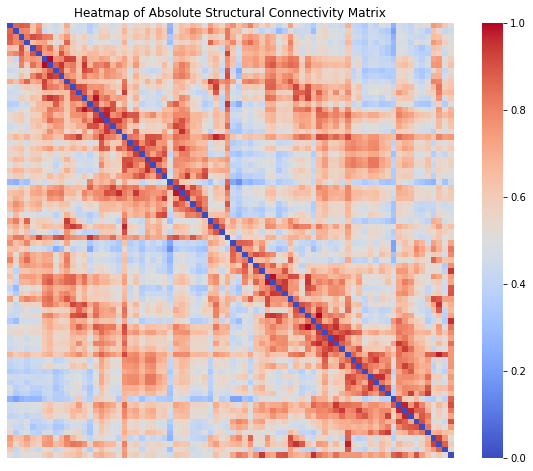

In [6]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
sns.heatmap(C, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Absolute Structural Connectivity Matrix')
plt.show()

In [25]:
def solve_ode_network(num_steps, dt, a, omega, beta, C, G=0.5):
    # Initialize the arrays to store the x, y values for all neurons
    x_values = np.zeros((num_steps, 78))
    y_values = np.zeros((num_steps, 78))
    # z_values = np.zeros((num_steps, 90))
    
    # Initialize x and y vectors with zeros
    x = np.ones(78)*0.5
    y = np.ones(78)*0.5

    for step in range(num_steps):
        # Generate a single random noise term for each neuron
        noise = np.random.randn(78, 1) * np.sqrt(dt)
        noise = noise.reshape(78)

        # Calculate the dxdt and dydt using the equations provided
        dxdt = (a - x**2 - y**2)*x - omega*y + G * np.dot(C, (x - x[:, None]).T).diagonal() 
        dydt = (a - x**2 - y**2)*y + omega*x + G * np.dot(C, (y - y[:, None]).T).diagonal()
        # print(dxdt.shape)
        
        # Update the x and y values
        x += dxdt * dt + beta*noise
        y += dydt * dt + beta*noise
        # z = np.sqrt(x**2 + y**2)
        
        # Store the values
        x_values[step, :] = x
        y_values[step, :] = y
        # z_values[step, :] = z
    
    return x_values, y_values

# Example usage:
num_steps = 10000  # for example
dt = 0.001  # time step
a = 0.0  # intrinsic dynamics parameters for each neuron
omega = 2 * np.pi * 12  # angular frequencies for each neuron
beta = 5  # noise level

# Solve the ODEs
x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C)

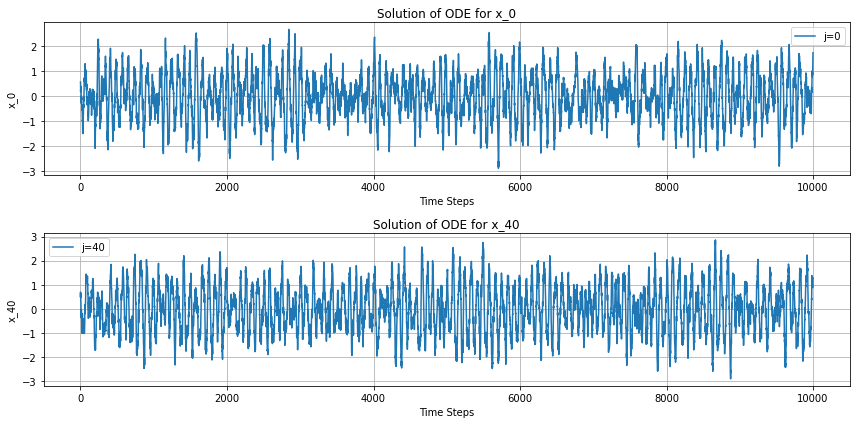

In [26]:
f = 12
j = np.array([0, 40])
fig, axes = plt.subplots(len(j), 1, figsize=(12, len(j)*3))

for i in range(len(j)):
    axes[i].plot(x_values[:,j[i]], label=f'j={j[i]}')
    axes[i].set_xlabel('Time Steps')
    axes[i].set_ylabel(f'x_{j[i]}')
    axes[i].set_title(f'Solution of ODE for x_{j[i]}')
    axes[i].legend()
    axes[i].grid(True)

plt.savefig(f"../Plots/python_plots/carrier_frequency_plots/beta={beta}_f={f}.png")
plt.tight_layout()

In [27]:
def plot_signals_for_frequencies(num_steps, dt, a, beta, C, G=0.5):
    frequencies = range(4, 30, 4)  # From 4 to 28, step by 4
    num_frequencies = len(frequencies)
    time = np.arange(0, num_steps * dt, dt)  # Time array
    
    # Creating subplots for each frequency
    fig, axs = plt.subplots(num_frequencies, 1, figsize=(10, 2 * num_frequencies), sharex=True)

    # Adding a main title to the figure
    fig.suptitle(f'X Values for G={G}, Beta={beta}, Frequencies {frequencies[0]}-{frequencies[-1]} Hz', fontsize=16)
    
    for i, f in enumerate(frequencies):
        omega = 2 * np.pi * f  # Angular frequency
        x_values, y_values = solve_ode_network(num_steps, dt, a, omega, beta, C, G)
        
        ax = axs[i] if num_frequencies > 1 else axs
        ax.plot(time, x_values[:, 0])
        ax.set_title(f'{f} Hz')
        ax.set_ylabel('X value')
    
    axs[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    
    # Saving the figure with G, beta, and frequency range in the filename
    filename = f'../Plots/python_plots/carrier_frequency_plots/x_values_G{G}_beta{beta}_freq{frequencies[0]}-{frequencies[-1]}.png'
    plt.savefig(filename)
    print(f'Saved: {filename}')

Saved: ../Plots/python_plots/carrier_frequency_plots/x_values_G0.5_beta5_freq4-28.png


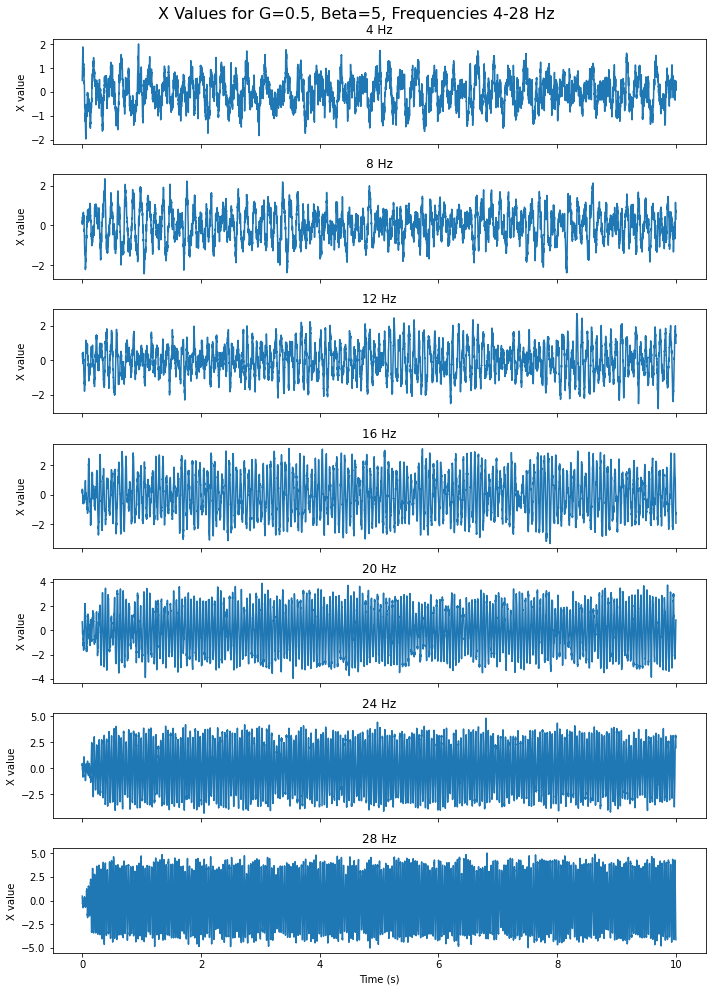

In [31]:
plot_signals_for_frequencies(10000, 0.001, 0.0, 5, C, 0.5)